## Money lines (also called betting lines)


Conventions in this discussion:

$$
\text{w} + \text{b} = \text{payout}
$$
where $w$ is the money won and $b$ is the money bet.  
So for example if you bet $\$100$ and win $\$200$, the payout is $\$300$.
Next:

$$
\text{odds} = \frac{\text{b}}{\text{w}}
$$
So continuing the previous example, winning $\$200$ when you bet $\$100$ means the odds were 0.5. 
>FN We will use the standard the mathematical definition of odds throughout where the odds are $p/(1-p)$, greater than 1 for $p > .5$ and less than one when $p < .5$.  Note that this definition, while consistent with the mathematical standard, is a little out of whack with ordinary usage.  When I say "Jimmy the Greek is offering  me 50 to 1 odds', we mean if I bet $\$1$ I stand to win $\$50$. That is odds of .02 by the definition above.

The issue is understanding how the money is made.  Or rather how the odds are distorted
in order for the bookies (the Vegas guys) to make money.

We are also going to need to deal with the concept of a favorite (the team most
people think is the most likely to win a given game) and the underdog (the team
most people think will lose).

Finally we are going to talk about probabilities. The probability of an
event is how likely it is to occur.  A probability distribution
is function $p$ from  a subset of some **sample space** $\Omega$ to
a real numbers between 0 and 1:

$$
p : 2^{\Omega} \rightarrow \lbrace \,0,\,1\,\rbrace
$$

Here we use $2^{\Omega}$  to denote the set of all possible sets of $\Omega$ (also known as
its powerset). We refer to a set of sample points (that is a member of the powerset)
as an **event**.  A sample space, then, is some characterization
of all possible outcomes of a certain type (for coin flips $\Omega$ is $\lbrace\,\text{H},\,\text{T}\,\rbrace$),
exactly one of which will happen when we consider events of that type.

A probability of 0 for an
event corresponds to impossibility.  For example, it is impossible
for none of the events in $\Omega$ to happen.  A probability of 1 corresponds 
to certainty: for example, it is certain that one of the events in $\Omega$ will happen (as
long we are talking coin flips the outcome will be H or T).
In terms of the axioms of probability theory this is spelled
out as follows:

$$
\begin{array}{lcl}
f(\Omega) &=& 1\\
f( \emptyset )&=& 0
\end{array}
$$

And for any **partitioning** $\Pi$ of $\Omega$ ($\Pi$ is a set
of disjoints sets whose union is $\Omega$):

$$
\sum_{e\in\Pi} p(e) = 1
$$

Lat's assume there are two outcomes ( as there will be for most of this discussion ) 
and let's call them W and L (for win and loss). Then we have

$$
p(\text{W}) + p(\text{L}) = 1
$$

Now one question that always arises in discussions of probability
is what do they **mean**?  what it does it mean to say that a certain event, let's say W, 
has a probability of .503 (or 50.3%) of happening?  

How could we come to such a conclusion?  Well, if it's a meangingful statement at all 
there must be some kind of a **probability model** into which we've poured a lot of **data**
which cranks out a number between 0 and 1 (and possibly some
confidence bars around that).  That's what political statistician Nate Silver does.  His data
includes, at least,  a lot of poll numbers at a given moment in time and confidence
ratings for each poll and, probably, some demographic data about states, which constrains
election outcomes for certain states to be strongly correlated, and who knows what else.
It appears from certain discussions on the website `fivethirtyeight.com` that this
model is embodied as an election simulation program with certain components that **draw from**
probability distributions determined by the data.  This might very well be 
a Python program, because Python provides a lot of facilities that allow you
to draw from distributions of known types and parameters.  

Then what Silver does to make a forecast is to run his simulation program many times.
And if he forecasts a 60.3% chance of W (say, Donald Trump wins the 2024 election),
that means Donald Trump won in 60.3% of the simulated elections. Meaning that what the model
is saying is that there's still very good chance of L  (Donald Trump loses the 2024 election).   (Leaving the discussion of confidence bars for another time).

The discussion below is about **moneylines**, betting lines set by bookies
or online gambling sites for upcoming events (often sporting events,
but also other sorts of events like election outcomes).  The convention
is that for a favorite the line is a negative number and for
an underdog it is positive.  For example, the betting  line for the NFL game
between the San Francisco Forty-Niners and New York Jets in 
early September was Niners -200, Jets 165.  The positive Jets number  165 
means that
if you bet on the Jets, a $\$100$ bet would win $\$165$.
The  negative Niners number of 200 
means that
if you bet on the Niners,  a $\$200$ bet would win $\$100$.
So the Jets are the underdog (you win more money than you bet)
and the Niners the favorite (you win less money).
By the convention for odds introduced above that means

$$
\text{odds of Jets winning} = \frac{100}{165} = .606
$$

Similarly
$$
\text{odds of Niners winning} = \frac{200}{100} = 2.0
$$

So the moneyline numbers correspond directly to odds but
they do so in different ways for the favorite
and the underdog.  For the favorite, the moneyline  $m$ is 
money bet, for the underdog $m$ is money won.  Using
m_f for the favorite moneyline and m_u for the underdog moneyline:

$$
\begin{array}{lclclcl}
\text{m_f}/100 &=& \text{odds} &\Rightarrow& \text{m_f} &=& 100 * \text{odds} \\
100/\text{m_u} &=& \text{odds}  &\Rightarrow& \text{m_u} &= &100 / \text{odds} 
\end{array}
$$

**Odds and Probability**:  The traditional mathematical definition of odds is 
stated in terms of probability:  The odds of event $e$ happening is the ratio between
p(e  happening) and  p(e not happening). 

$$
(1) \; \text{odds} = \frac{p}{1-p}
$$


Solving for p in (1):
$$
\begin{array}{ll}
(2) & p = \frac{\text{odds}}{1+\text{odds}}
\end{array}
$$

Using the Jets Niners line from above as an example, we have

In [370]:
o = 1/1.65  # 0.6051364365971108
p = o/(1+o)
p

0.37735849056603776

And back from probabilities to odds:

In [507]:
.377/.623

0.6051364365971108

The code below implements both ideas, going from odds to probabiliites and from
probabilities to odds.  It also implements going from a money line number
odds.  All of these calculations should be clear now,  Looking
at the code is good practice if you need to review.

Now if the laws of probability were the only thing at work in moneylines, a moneyline
would only need one number.  By the definitions given above, you can deduce the fair
moneyline for the favorite from the moneyline for the underdog, and vice versa.
The only reason there are two numbers is so that the House can make money.  Let's
illustrate.

Using our example,  the underdog moneyline of 165 corresponds to a particular probability for the underdog:

$$
p(\text{dog}) = \frac{1}{1 + 1.65} = .377
$$

That implies

$$
p(\text{fav}) = 1 - .377 = .623
$$

Now we can plug this in to (1)  to compute the odds for the favorite:

$$
\text{odds fav} = \frac{.623}{.377} = 1.65
$$

And we can keep running with this to see what the fair money line for these odds is.


$$
%%  b/w* 100 = m_f
\begin{array}{llcl}
(3) &     \text{m_f} &= &\text{odds fav} * 100\\
\end{array}
$$

$$
m = 100 * 1.65 \Rightarrow m = 165
$$

So the implied moneyline for the favorite given a moneyline
of 165 for the underdog is -165.  That's nice and symmetric
and intuitive.

But wait, that's not what the moneyline for the favorite actually is.
The oddsmakers set it at -200.

So if the  -165 moneyline is the what's fair when the dog moneyline is 165,
and if the oddsmakers charge those who bet the favorite 200 to win 100, they are overcharging
them by $35. That's the oddsmakers making their money.

We're going to translate all this moneyline into probabilities to have a consistent
way of talking about it
and for that we need some new terminology. We started out looking at this from the underdog's point of view, but
we might just as well have started with the favorite.  The two
different lines will give us two different **offered probabilities** for the favorite:

$$
\begin{array}{lrcr}
\text{Moneyline} & \text{Amt} & & \text{Prob offered for Fav}\\
\hline
\text{Dog:} &  165 &\Rightarrow & .623  \\
\text{Fav:} & -200 &\Rightarrow & .667
\end{array}
$$

The first line shows **the probability for the favorite offered by the underdog moneyline**.
We just computed that. 

The second line show **the probability for the favorite offered by the favorite moneyline**.  We compute that in the next code cell:


In [374]:
odds_fav = 200/100
# probability for favorite offered by the favorite moneyline
p_fav_fav = odds_fav/(1 + odds_fav)
p_fav_fav

0.6666666666666666

Of course a probability of .667 for the favorite implies a probability .333 for the dog (not .377 as before)
And that gives us new odds for the dog:

In [375]:
# probability for underdog offered by the favorite moneyline
p_dog_fav = 1 - p_fav_fav
odds_dog_fav = p_dog_fav/(1 - p_dog_fav)
odds_dog_fav

0.5000000000000001

Recall that

$$
\begin{array}{llcl}
(4) &\text{m_dog} &=& \frac{100}{\text{odds}}
\end{array}
$$

So our favorite moneyline of -200
implies that the fair moneyline for the dog is 200, not 165.  

$$
\begin{array}{llcl} 
    &\text{m_dog} &=& \frac{100}{.5} = 200\\
\end{array}
 $$

So the generalization is clear.  To get the other fair moneyline $om$ starting with either the favorite or the dog
$m$, you just multiply $m$ by -1. And whichever moneyline we start with we get different answers for what's fair.
Just as we get different probabilities for the favorite depending on whether we start with
the underdog moneyline (the probability is .623) or the favorite moneyline (the probability
is .667).

We can suppose that the the true probability of a favorite win lies between these two numbers.
As a first guess, let's take the average which is .645.  This corresponds to a fair moneyline
of -181.4 for the fav and 181.4 for the dog.  So by this calculation
we overcharge the favorite bettor (200-181.4)/181.4 = 10.25%,
and we underpay the dog bettor (181.4-165)/165 = 9.9%.

And as we'll see below, it is by distorting the true probabilities that profits are made.

## How much money do the oddsmakers make?

As we just saw there's more going on with moneylines than just probability theory.  There's making money.
And how much money is made depends on how the bets are distributed.
Let's say that the line starts at -200,165 and that 90% of the betting
 money is on the favorite.  What will happen to the house's profits?  Well,
there's no real need for probabilities here.

Let's call the total bets T, we have .9T on the favorite and .1T on the dog.

Here are the two scenarios

I Dog wins: House pays out 1.65*.1T = .165T to dog bettors; collects .9T from the fav bettors
for a net gain of .735T  Hooray!

II: Fav wins:  House pays out .45T to fav bettors; collects .1T from the dog bettors
for a net loss of .35T Uh oh.

Two things to remember here.  It's the NFL.  So, on any given Sunday...  And T is a very big number.
So this is pretty big exposure for the house. A concept that's used in trying to deal with
probability in the context of gains and losses is **expected utility**.  The expected utility
of a betting line (or a business or game-playing strategy) is the sum of the net gains
for each possible outcome weighted by their probabilities. In other words, it's the
average net gain.

And the expected utility in this case isn't great.

```python
Prob(Fav) * NetGainFavWin + Prob(Dog) * NetGainDogWin
```

Using  .645 as the actual probability for a favorite win.


```python
.645 * -.35T + .355*.735T = .035T
```

So this is a small but probably acceptable gain, 
expectationwise.   More importantly than the expected utility,
from the point of a view of a betting
manager whose job on the line, the chance of that .35T loss is .645, which is pretty high.

What about reversing the betting proportions?  Same money line.  .9 on the dog.

Here are the two scenarios:
  
   1.  Dog wins: House pays out 1.65*.9T = 1.485T to dog bettors; collects .1T from the fav bettors for a net loss of 1.385T  Ouch.  Remember T is a big number.

   2.  Fav wins:  House pays out .05T to fav bettors; collects .9T from the dog bettors for a net gain of .85T.  Nice.

And the expected utility is a little better: 

```python
.645 * .85T - .355*1.385T = 0.0566 T
```

But more important than the utility perhaps is that the chance of a very large loss
of 1.485T is .355, which not that small a chance. Every time you roll a die
something with a smaller chance of happening happens.  And this is the NFL.
That probability is .355 rather than 0 because underdogs win nearly every Sunday.

So  both of these situations, but especially the second, are  situations
where the line might be moved in an effort to change the distribution of bets.
We'll take a systematic look at moving the betting line below. Right
now you're ready to work some examples, which is exercise one.

**Exercise One**:   

The house decides to move the line from 165, -200 to 170 -210.  So in particular, the favorite
line has moved from -200 to -210.  There  are two reasons
the line might change (a) the House is trying to redistribute the bets because the
current state of the betting has some unattractive features moneymaking-wise; (b)
the facts have changed (it has been announced that a star player will not play)
and so the underlying probabilities have changed.

1. Assuming the House is moving the line in order to redistribute the bets, which team does the House think will attract more bets with this new line? why?  Compute the probability of a favorite win offered by the favorite line before the change (165, -200) Then compute it after (170,-201).  Assume the TRUE probabilty of a favorite win hasn't changed. With the favorite line at -210, has the probability offered for a favorite win gotten closer to the truth or  further away?

2.  Assuming the House is moving the line because the true probability of a favorite win changed: Did the true probability  go up or down?  Support your answer by discussing the relationship of three probabilities: the probability of a favorite win  offered by the favorite line, the probability of a favorite win offered by the underdog line,  and the true probability of a favorite win.

3.  After moving the line from (165, -200) to (170 -210), the line then goes to (155 -190).  Discuss both of the reasons for moving the line discused in questions 1 and 2.  Can you you tell which is responsible for moving the line this time?  If so, explain how.  If not compute the probability of a favorite win offered by this latest line, and consider each case in turn.

Summary:  a standard betting moneyline gives two numbers one positive (the underdog line)
the other negative (the favorite line)

For both numbers to give a consistent probability for a favorite win, a moneyline of -200
for the favorite would imply a money line 200 for the underdog.  This is what we called
a **fair** moneyline above.  A moneyline of -200 means you need to bet $\$200$ to win $\$100$, so that's the odds  of the favorite are 2:1, which means a fair line needs to offer 1:2 odds for the underdog:
To bet on the underdog, you need to bet  $\$100$ to win $\$200$.  

Instead what we saw above
was that a moneyline of -200 for the favorite was paired with a moneyline
of 165 for the underdog.
So if the -200 line offers the true probability for the favorite, we are underpaying
the underdog winner.

Below we sketch the proof given above 
that any fair moneyline is of the form (-m, m).  That is, the favorite line is the
negative of the underdog line.  We shortening the calculations a bit to highlight the relationships more.

In [377]:
# dog prob (you can change this to a favorite [>.5] prob if you want; the code remains the same)
p=.25
# fav prob
q = 1 -p
o_d = p/q # p/(1-p)
o_f = q/p #(1-p)/(1-(1-p)) =   (1- p)/p
# fav moneyline m_f:  100 = m_f*o_f => m_f = 100/o_f [=> m_f = 100/(p/q)  = 100*(q/p)]
m_f = 100*o_f
# dog moneyline m_d:  100*o_d = m_d [=> m_d = 100 *(q/p)]
m_d = 100/o_d
(m_d,m_f)

(300.0, 300.0)

## Code for converting money line number into odds and probabiilities.

In [2]:
import numpy as np


def get_odds (money_line):
    ## 100 = earnings_per_dollar_bet * money_line_for_favorite
    ## 100 * earnings_per_dollar_bet = money_line_for_underdog
    # ignoring minus sign
    #money_line = np.abs(money_line)
    if money_line < 0:
        #earnings_per_dollar_bet = 100/money_line
        bet, win = -money_line, 100
    else:
        #earnings_per_dollar_bet = money_line/100
        bet, win = 100, money_line
    # earnings_per_dollar_bet is another name for odds
    return bet/win

def get_probs (odds):
    """
    Return p, the prob corresponding to odds,
    as well as 1-p.
    
    Definition
    
    odds = p/(1-p)  always
    
    Solving for p:
    
        p = odds/(1+odds)

    """
    return odds/(1+odds), 1/(1+odds)


def money_line_to_probs (fav,under):
    return get_probs(get_odds (fav)), \
            get_probs(get_odds (under))

def prob_to_moneyline(p):
    o = p/(1-p)
    if o>=1:
        return -100*o
    else:
        return 100/o

Example

In [3]:
fav_line,dog_line=-275,225
o = get_odds(fav_line)
print(o)
# Probabilities induced by these odds for the favorite (sum to 1)
o_probs = get_probs(o)
print(f"{o_probs[0]:.3f} {o_probs[1]:.3f}")

2.75
0.733 0.267


In [4]:
fav_line_probs, dog_line_probs = money_line_to_probs (fav_line,dog_line)
print(f"{fav_line_probs[0]:.3f} {fav_line_probs[1]:.3f}")
print(f"{dog_line_probs[0]:.3f} {dog_line_probs[1]:.3f}")

0.733 0.267
0.308 0.692


Some example lines from the week of Sun, Sept 7, 2024.

In [393]:
lines = {("sea","den"): (-275,225),
         ("lac","lv"): (-155,130),
         ("cle","dal"): (-125,105),
         ("tb","was"):  (-200,165),
         ("det","lar"): (-200,165),
         ("sf","nyj"): (-200,165),
         ("sf2","nyj2"): (-210, 170),
         ("sf3", "njj3"): (-190, 155)} 

for (teams,line) in lines.items():
    print(*teams)
    (fav_probs,under_probs) = money_line_to_probs (*line)
    f_money,u_money = line[0],line[1]
    f_odds, u_odds = get_odds(line[0]),get_odds(line[1])
    print(f"  Fav Money: {f_money: 5} Odds: {f_odds: 5.3f} Induced Probs: {fav_probs[0]:.3f} {fav_probs[1]:.3f}")
    print(f"  Und Money: {u_money: 5} Odds: {u_odds: 5.3f} Induced Probs: {under_probs[1]:.3f} {under_probs[0]:.3f}")
    # Difference in fav probs from the two lines; Sum of fav_{favline}+dog_{dogline} probs;
    # Sum of fav_{dogline}+dog_{favline} probs;
    # print(f"  FDf: {fav_probs[0]-under_probs[1]:.4f} {fav_probs[0]+under_probs[0]:.4f} {fav_probs[1]+under_probs[1]:.4f}")
    #Implied money line
    #print(f"IML: FAV {prob_to_moneyline(fav_probs[1]):.4f} UND {prob_to_moneyline(under_probs[1]):.4f}")

sea den
  Fav Money:  -275 Odds:  2.750 Induced Probs: 0.733 0.267
  Und Money:   225 Odds:  0.444 Induced Probs: 0.692 0.308
lac lv
  Fav Money:  -155 Odds:  1.550 Induced Probs: 0.608 0.392
  Und Money:   130 Odds:  0.769 Induced Probs: 0.565 0.435
cle dal
  Fav Money:  -125 Odds:  1.250 Induced Probs: 0.556 0.444
  Und Money:   105 Odds:  0.952 Induced Probs: 0.512 0.488
tb was
  Fav Money:  -200 Odds:  2.000 Induced Probs: 0.667 0.333
  Und Money:   165 Odds:  0.606 Induced Probs: 0.623 0.377
det lar
  Fav Money:  -200 Odds:  2.000 Induced Probs: 0.667 0.333
  Und Money:   165 Odds:  0.606 Induced Probs: 0.623 0.377
sf nyj
  Fav Money:  -200 Odds:  2.000 Induced Probs: 0.667 0.333
  Und Money:   165 Odds:  0.606 Induced Probs: 0.623 0.377
sf2 nyj2
  Fav Money:  -210 Odds:  2.100 Induced Probs: 0.677 0.323
  Und Money:   170 Odds:  0.588 Induced Probs: 0.630 0.370
sf3 njj3
  Fav Money:  -190 Odds:  1.900 Induced Probs: 0.655 0.345
  Und Money:   155 Odds:  0.645 Induced Probs: 0.608

Note:  Each game described above has two lines, the "Fav Money" (moneyline for the favorite) and
the "Und Money" (moneyline for the underdog).  
The offered probabilites printed out on each line are always in the 
order favorite/underdog.  Note that the probability for the
favorite in the Fav Money line is always greater than the probability 
for the favorite in the Und Money line (For the Seattle/Denver game,
.733 > .692).  The opposite is true for underdog: the probability for the
underdog in the Fav Money line is always less than  its probability in the Und Money line (Again Seattle Denver:
.267 < .308).   This is a theorem for all moneylines where the oddsmaker is 
trying to make money, as we'll see in the next section.
The final three examples above are lines for the same game from
three different days. 

In the plot below, we plot probabilities versus line
moneyline numbers.  The points connected by dashed lines
are the dog and favorite lines on the same game on the same day.
The points shown are actually for one game on three different days, showing
how the line moved right, then left. The orange line (dog probabilities) 
is 1 - the blue line (favorite probabilities).  Hence, 
if the the dog and favorite points were offered by a fair moneyline, they
would be connected by a vertical
dashed line.  That means the slope of the dashed lines
indicates the **disagreement** between the probabilities in the favorite
moneyline and underdog moneyline.   Moving the favorite
point to the right means increasing both the moneyline number (remember, minus signs
are being ignored) and the probability of the favorite.

200 165 35 0.6666666666666666 0.37735849056603776
210 170 40 0.6774193548387097 0.37037037037037035
190 155 35 0.6551724137931034 0.39215686274509803


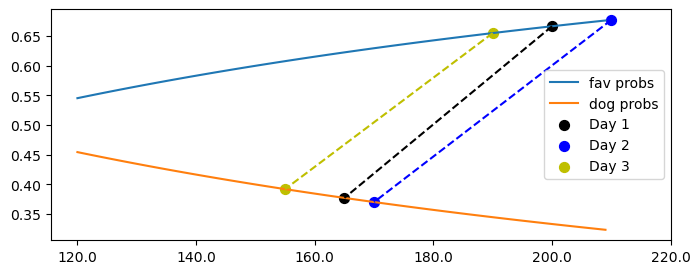

In [429]:
import matplotlib as mpl
from matplotlib import pyplot as plt

f = lambda x: get_probs(get_odds (-x))
g = lambda x: get_probs(get_odds (x))

x = np.arange(120,210,1)

# trith value of an array error
#y0,_y1 = zip(*f(x))
#y2,_y3 = zip(*g(x))

y0 = np.array([f(xval)[0] for xval in x])
y3 = np.array([g(xval)[0] for xval in x])

fig,ax = plt.subplots(1,1,figsize=(8,8))

def plot_day(fav,dog,label,color,fac=.01):
    fav0,dog0=fac*fav,fac*dog
    #fav0,dog0=fav,dog
    ax.scatter([fav0,dog0], [f(fav)[0],g(dog)[0]],c=color,s=50,label=label)
    ax.plot([fav0,dog0], [f(fav)[0],g(dog)[0]],c=color,linestyle="--")
    
def slope (fav0,dog0):
    return f(fav0)[0]-g(dog0)[0]  /(fav0-dog0)

fac=.01
ax.plot(fac*x,y0,label="fav probs")
ax.plot(fac*x,y3,label="dog probs")
plot_day(200,165,"Day 1",color="k",fac=fac)
plot_day(210,170,"Day 2",color="b",fac=fac)
plot_day(190,155,"Day 3",color="y",fac=fac)
#plot_day(140,120,"Day X",color="g",fac=fac)
ax.legend()
ax.set_xticks(ax.get_xticks()[1:])
ax.set_xticklabels([t/fac for t in ax.get_xticks()])
ax.set_aspect("equal")

#ax.set_ticklabels()
print(200,165,200-165,f(200)[0],g(165)[0])
print(210,170,210-170,f(210)[0],g(170)[0])
print(190,155,190-155,f(190)[0],g(155)[0])
#print(140, 120,140-120,f(140)[0],g(120)[0])
#plt.show()


##  The Probability Inflation Principle

Let's call the outcome bet on the proposition.  For a favorite bettor, the
proposition is that the favorite wins.  For an underdog bettor the proposition is
that the underdog wins. 

The title of this section is the name I have chosen for the
oddsmakers' money making principle.

**Probability Inflation Principle (PIP)**
>The probability offered on any proposition
should be greater than the actual probability of the proposition.

In other words, the offered probability always inflates the probability of what the bettor bets on.
For example.

1.  Fav bettor: Actual p is .6 (fair odds=.667, fair line=-150).  Offer p=.62 (odds = .613,line=-163).
2.  Dog bettor: Actual p is .4 (fair odds=1.5, fair line=150).    Offer p=.42 (odds = 1.38,line=138).

The calculations for this example are in the next code cell.


In [397]:
#Fav
p=.6
of = p/(1-p)
mf = prob_to_moneyline(p)
# Inflate p
po = p+.02
oo = po/(1-po)
mo =  prob_to_moneyline(po)
print(f"Fav: {mf: >4.0f}  {of:5.3f}  {mo: >4.0f}  {oo:5.3f}")
#Dog
p=.4
of = p/(1-p)
mf = prob_to_moneyline(p)
# Inflate p
po = p+.02
oo = po/(1-po)
mo =  prob_to_moneyline(po)
print(f"Und: {mf: >4.0f}  {of:5.3f}  {mo: >4.0f}  {oo:5.3f}")

Fav: -150  1.500  -163  1.632
Und:  150  0.667   138  0.724



Now the next question is:  Why is the PIP valid?  One thing that's clear at the outset is
that more money is made by following the PIP. 


For any given proposition and any given bet,
increasing the probability of the proposition means reducing the payout.  The is illustrated
in the next two cells for the favorite and dog numbers from the last example:

In [405]:
# Let's bet 100, so we lose 100 if the bet is lost
p,b=.4,100
o =p/(1-p)
#o=b/w => b*o = bet needed to win b ; b/o = w
print(f"p {p:.2f} o {o:.2f} b {-b:d} won {b/o:.0f} to win b {-b*o:.0f}")
p+=.02
o =p/(1-p)
print(f"p {p:.2f} o {o:.2f} b {-b:d} won {b/o:.0f} to win b {-b*o:.0f}")

p 0.40 o 0.67 b -100 won 150 to win b -67
p 0.42 o 0.72 b -100 won 138 to win b -72


In [407]:
p,b=.6,100
o =p/(1-p)
print(f"p {p:.2f} o {o:.2f} b {-b:d} won {b/o:.0f} to win b {-b*o:.0f}")
p+=.02
o =p/(1-p)
print(f"p {p:.2f} o {o:.2f} b {-b:d} won {b/o:.0f} to win b {-b*o:.0f}")

p 0.60 o 1.50 b -100 won 67 to win b -150
p 0.62 o 1.63 b -100 won 61 to win b -163


The printouts show the probability, the corresponding odds, the bet (always 100),
the amount won, and the amount the better would need to bet to win 100.
The first line after each cell gives those numbers for the fair probability
and the second line the numbers after the probability is inflated by .02.
Positive integers are wins for the bettor; negative integers are bettor outlays.
In every case the numbers change in favor of the house.  The wins 
go down and the outlays go up.

So jacking up the probability always improves things for the house.  That's
just a numerical fact.   You should now be ready to tackle Exercise Two.

**Exercise Two:  An impossible line**:   

Consider the following line:

```python
-165, 200
```

This line is incompatible with the PIP.  Explain why.

Line of attack:  Compute the probability for the favorite induced by the favorite line
and the probability for the favorite induced by the underdog line.  Do the same for the
underdog probabilities.  Consider these 4 numbers and the relationship they must
have to the true probabilities according to the PIP (the axioms of probability
discussed above also play a role).  There's some code implementing
this suggestion several cells down if you have trouble following it. 

In [505]:
def moneyline_to_odds_and_prob (m):
    o = get_odds(m)
    return o,get_probs(o)

of_f, ps_f = moneyline_to_odds_and_prob (-165)
pf_f,pu_f = ps_f[0],ps_f[1]
print(f"Offered by Fav line {pf_f:.3f} {pu_f:.3f} ")
ou_u, ps_u = moneyline_to_odds_and_prob (200)
pu_u,pf_u = ps_u[0],ps_u[1]
print(f"Offered by Und line {pf_u:.3f} {pu_u:.3f}")

Offered by Fav line 0.623 0.377 
Offered by Und line 0.667 0.333


### Soln to exercise 2

In [431]:
##  An impossible line
fav_line  = -165
p_fav_fav,p_und_fav = get_probs(get_odds (fav_line))
print(p_fav_fav,p_und_fav)

0.6226415094339622 0.37735849056603776


The first number is the probability for a favorite win offered by the favorite moneyline
(we call this `p_fav_fav` in the code).  According to the PIP, it
should be greater than the true probability of a favorite win (call this `p_fav_t`).  The second number is 
the probability for an underdog win offered by the favorite moneyline
(`p_und_fav` in the code).  It is simply  `1 - p_fav_fav`. According to the
PIP, it should be **lower** than the actual probability of an underdog win
(call this `p_und_t`). Why?

As just noted, the PIP says:

$$ .623 = \text{p_fav_fav} > \text{p_fav_t} $$

It follows that 

$$.377 = \text{p_und_fav} = (1 - \text{p_fav_fav}) < (1 - \text{p_fav_t}) = \text{p_und_t}$$

So far so good.  We have established

$$
\text{p_und_t} > .377
$$


To unveil the inconsistency, we 
turn to the  probability of the underdog winning offered by the underdog line.

In [411]:
dog_line = 200

p_und_und,p_fav_und = get_probs(get_odds (dog_line))
print(p_und_und)

0.3333333333333333


And now we have it. The PIP tells us:

$$
.333 = \text{p_und_und} > \text{p_und_t}
$$

And combining the last two results we get:

$$
.377 < \text{p_und_t} <.333,
$$

which is impossible.  We have shown, as requested, that the betting line -165, 200
is inconsistent with the PIP.

### Discussion

The generalization, which you've probably already guessed, is that in order to
be consistent with the PIP, the absolute value of the favorite line has to be greater
than the underdog line.  So -200, 165 good; -165, 200 bad.   

To simplify the statement of our target proposition, we'll
use  assume betting lines with only positive numbers and we'll 
just keep track of which number is the favorite moneylien.
Then what we want to show is that for any moneylines obeying the PIP,

$$ \text{m_fav} > \text{m_und}. $$

To sketch a proof we recall from our discussion of the solution to Exercise 2 to that
when PIP is followed

$$
\text{p_und_und} > \text{p_und_t} > \text{p_und_fav}
$$


We showed in our discussion of fair moneylines that the fair underdog moneyline 
corresponding to a given favorite moneyline $\text{m_fav}$ is always $-\text{m_fav}$.  In the context of the current
discussion  (where we are ignoring the minus signs)
that means the underdog moneyline corresponding to probability $\text{p_und_fav}= 1 - \text{p_fav_fav}$
is just $\text{m_fav}$ (you can confirm this by working through the formulas).
The desired result then follows from the fact that the
function from underdog probabilities to underdog moneylines (call
it `prob_to_moneyline_u`) is monotone decreasing: as the
probability of the underdog winning goes up, the moneyline goes down.  That is, from

$$
\text{p_und_und} > \text{p_und_fav}
$$

it follows that

$$
\text{m_fav} = \text{prob_to_moneyline_u}(\text{p_und_fav})  > \text{prob_to_moneyline_u}(\text{p_und_und}) = \text{m_und}
$$

The monotone decreasing nature of `prob_to_moneyline_u` can be seen in the plot in the plot for Part C below; it's also pretty intuitive. The less of a longshot the underdog is, the lower the  amount of money won.



**Exercise three:**  

**Part A**: Fill in some of the missing steps in the above argument as follows.  Define a Python function  `prob_to_moneyline_fav` that maps from a favorite probability to a moneyline (omit minus signs).  Define another  function `prob_to_moneyline_und`   that maps from an underdog probability to a moneyline.  The two functions will obviously share features but they will be different.

**Part B**: Prove that `prob_to_moneyline_fav(p) = prob_to_moneyline_und(1-p)`.  Note part B is not a coding exercise.  Write down the formulae for `prob_to_moneyline_fav(p)` and  `prob_to_moneyline_und(p)`.  Both formulae should express the moneyline just in terms of `p`. They will be pretty simple.  Use those to prove the desired result.

**Part C**: Demonstrate that `prob_to_moneyline_und(p_und)` is monotone decreasing by plotting it over the open interval $0<p<.5$.

**Parrt A:**   We depart slightly from the instructions and define one function
defined for all probabilities but with two different cases for favorites
and underdogs.

In [432]:
import numpy as np

def prob_to_moneyline(p):
    assert 0<=p<=1,"P must be a valid probability value"
    o = p/(1-p)
    if o > 1:
        return 100*o
    elif o > 0:
        return 100/o
    else:
        # If the proposition is a certainty, charge infinity to bet on it.
        # That'll show 'em.'
        return np.infty

def alt_prob_to_moneyline(p):
    """
    Another arguably clearer way to define prob_to_moneyline.
    """
    assert 0<=p<=1,"P must be a valid probability value"
    und_prob,fav_prob = sorted([p,1-p])
    return 100*(fav_prob/und_prob)

print(prob_to_moneyline(.75))
print(prob_to_moneyline(.25))
print(prob_to_moneyline(.5))
print(alt_prob_to_moneyline(.75))
print(alt_prob_to_moneyline(.25))
print(alt_prob_to_moneyline(.5))

300.0
300.0
100.0
300.0
300.0
100.0


In [419]:
#p_to_m_f p=.75
100*(.75/(1-.75))

300.0

In [420]:
#p_to_m_f p=.25
100*((1-.25)/.25)

300.0

**Part B:**

$$
\begin{array}{lcl}
\text{prob_to_moneyline_f}\,(p) &=&  \frac{100\,p}{1-p}\\
\text{prob_to_moneyline_u}\,(p) &=& \frac{100\,(1-p)}{p}\\
\text{prob_to_moneyline_u}\,(1-p) &=& \frac{100\,p}{1-p} 
\end{array}
$$

Note that the monotone decreasing nature of $\text{prob_to_moneyline_u}$ is clear from its definition:
it is 100 times a number that has to grow smaller as $p$ grows larger, since the numerator shrinks as
the denominator grows.

**Part C**

We plot prob_to_moneyline to illustrate the fact that for probabilities $< .5$ it is
monotone decreasing.  Note how the opposite is true for favorite probabilities ($> .5$).  As the probability
of a favorite win grows, we charge more and more to win $\$100$.

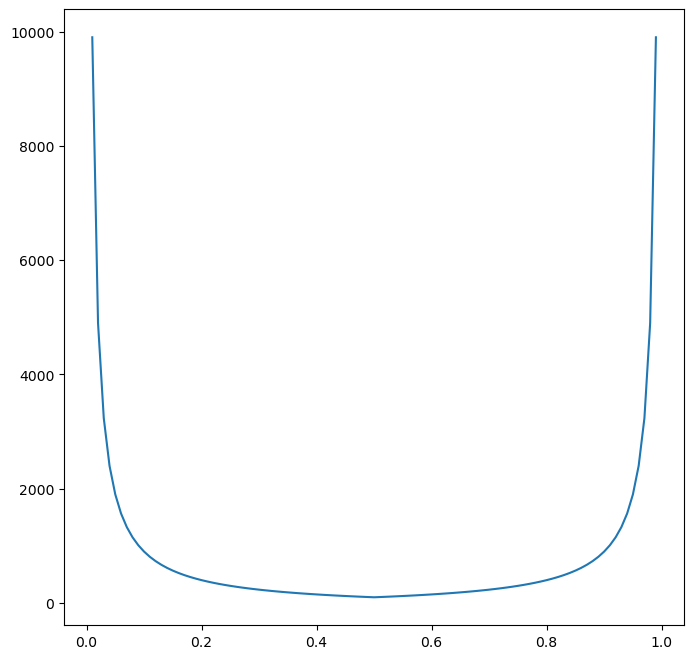

In [433]:
import matplotlib as mpl
from matplotlib import pyplot as plt

x = np.arange(.01,1.00,.01)
y0 = np.array([prob_to_moneyline(xval) for xval in x])

fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(x,y0)

## Expected utility and PIP

Interestingly, the expected utility for the moneyline of exercise 2 is pretty bad.  Looking at the case 
of an even distribution of bets, we get an expected loss.

In [459]:
fav_line,dog_line=165,200
get_utility(*get_net(.5,fav_line=fav_line,dog_line=dog_line))

-0.12067610062893078

It turns out the expected utility of this money line is everywhere negative.  So, not really a contender.

Let's try to get a better grasp of why.  What we know so far is that if the oddsmakers follow the PIP,
they will make money in the long run.  What we haven't shown yet is that if you violate the PIP,
the best you can do in the long run is break even.  And breaking even happens exactly when the offered
probability is equal to the true probability, so the moneyline would be of the form (-m, m).

Let's visualize this in a plot:  Holding the dog line constant at 200 and looking
at even betting splits between the favorite and the dog (for
simplicity), here's what happens as we raise the favorite's absolute value from too little
to too big:

In [8]:

def get_exposure (fav_percent,fav_line=200,dog_line=165):
    """
    Return worst case loss and worst case prob
    """
    nets, probs = get_net(fav_percent,fav_line=fav_line,dog_line=dog_line)
    idx = nets.argmin()
    return nets[idx],probs[idx]
    
def get_net(fav_percent,fav_line=200,dog_line=165):
    """
    Given fav_percent (percentage of total bets T bet on favorite)
    return net for the given line.
    
    We extimate true probabilities here because we are trying to return
    probabilities suitable for a utility calculation, so the closer to
    true the better.
    """
    dog_percent = 1 - fav_percent
    o_f =get_odds (-fav_line)
    o_d =get_odds (dog_line)
    p_fav_f = get_probs(o_f)[0]
    p_fav_d = get_probs(o_d)[1]
    p_f = (p_fav_f + p_fav_d)/2
    p_d = 1 - p_f
 
    # Fav wins: rake in dog bets, payout on fav per fav odds
    fav_net = dog_percent -(fav_percent / o_f) 
    # Dog wins
    dog_net = fav_percent - (dog_percent / o_d) 
    return np.array([fav_net,  dog_net]), np.array([p_f, p_d])

def get_utility (payoff_array, prob_array):
    return payoff_array.dot(prob_array)

#get_net(.9)

Text(0.5, 1.0, 'Utilities vs. Favorite line (Dog line = 200)')

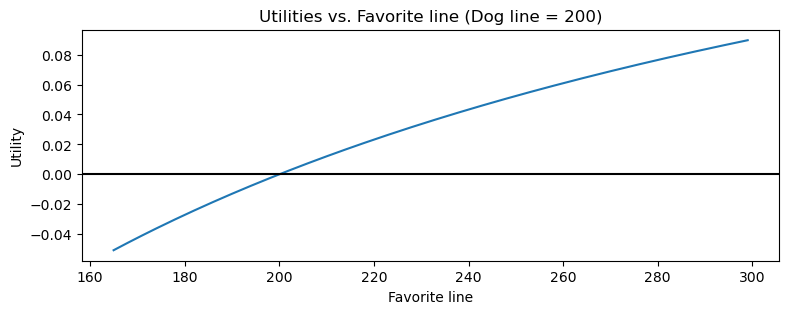

In [487]:
import matplotlib as mpl
from matplotlib import pyplot as plt

fig,ax = plt.subplots(1,1,figsize=(9,3))

x = np.arange(165,300,1)
#fav_percent,fav_line=200,dog_line=165):
y = np.array([get_utility(*get_net(.5,fav_line=xx,dog_line=200)) for xx in x])
ax.plot(x,y)
ax.set_ylabel("Utility")
ax.set_xlabel("Favorite line")
ax.axhline(y=0, color='k')
ax.set_title("Utilities vs. Favorite line (Dog line = 200)")
#ax.set_aspect("equal")

The utility is 0 (the blue line crosses the x-axis) when the favorite's line is -200.  That means that 
when the absolute value of the favorite line equals the dog line, on average the house makes no money.   This is what we called a "fair" money line above, one where the offered probability equals the actual probability. And of course a house that consistently offers "fair" probabilities will soon be unable to pay the rent.  After crossing that breakeven point, the favorite line yields positive utility.  

Note that crossing that breakeven point also means beginning to obey the PIP.  From that
point on the favorite line is greater than 200, the underdog line used for this
plot.

As we wander out to a line of 
-300, 200 we reach a  dizzying utility of .08, but by that time, in the real world, very few are betting the favorite, because they are not sure enough of the outcome
to risk $\$300$ to make a measly $\$100$.   So moving the line is like
all price-setting.  The graph tells  you you make a fortune if you set the price high,
but your customers tell you "Good-bye!"

So the balancing act the house must execute is to inflate the probabilities as much as their bettors will bear,
which always increases the difference between the favorite and underdog line (ignoring minus signs again), and that's usually not very much.  

###  Disaster for the house

A fun example of  the moneyline misfiring is the famous case of the 
Buster Douglas/Mike Tyson fight of 1990, which heavyweight champion Mike Tyson lost by a knockout to Douglas,
who was a **huge** underdog.  The line I've seen in discussions of the betting was


```python
5000, -4000
```

Yes, that means if you bet $\$100$ on Douglas that night, you won $\$4,000$,  and if you made the sad mistake
of trying to win an "easy" $\$100$ by betting on the favorite, you lost $\$5,000$.  The odds offered
by the favorite moneyline are 50 and the odds for the challenger .025.  
Nearly everyone thought Tyson was going to win.  The issue up for debate was how many seconds
the fight would last. This is widely
considered the geatest sports upset of all time (pace the U.S. Hockey team's  win against 
the Soviet team in the 1980 Olympics).  

Interesting, the probability gap between the favorite and the challenger line isn't as big as it is
for a routine NFl game.

The odds for this betting line:

In [205]:
get_odds(-5000), get_odds(4000),

(0.02, 40.0)

The probability gap between the favorite and underdog lines in the Tyson-Douglas fight:

In [199]:
pfs = get_probs(get_odds(-5000))
pds= get_probs(get_odds(4000))
pfs[0]-pds[1]

0.004782400765184103

The same calculation for the Niners/Jets line discussed above:

In [200]:
pNs = get_probs(get_odds(-200))
pJs= get_probs(get_odds(165))
pNs[0]-pJs[1]

0.04402515723270439

In [201]:
(pNs[0]-pJs[1])/(pfs[0]-pds[1])

9.205660377358527

So the probability gap in the NFL game is about 9 times as great as in the Tyson fight.   Interpretation: in order to stir up betting action on this fight, the oddsmakers were  actually offering very close to fair odds.

This is what got them into trouble.

We'll speculate on how they did below.

Text(0.5, 1.0, 'House Exposure Tyson Douglas')

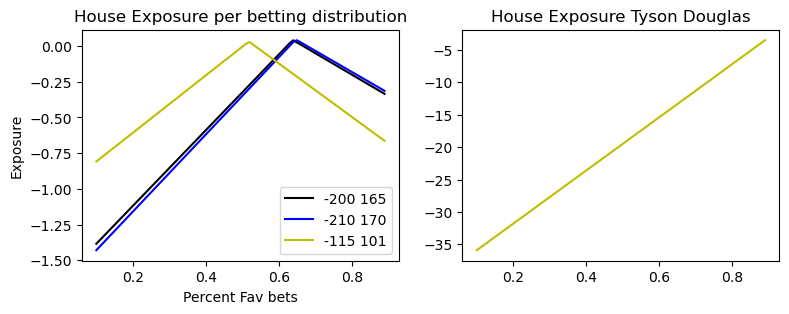

In [504]:
####  NEW CODE CALLED

import matplotlib as mpl
from matplotlib import pyplot as plt

fig,(ax0,ax1) = plt.subplots(1,2,figsize=(9,3))


x = np.arange(.10,.90,.01)

fav,dog = 200,165
y = np.array([get_exposure(xx,fav_line=fav,dog_line=dog)[0] for xx in x])
fav,dog = 210,170
y2 = np.array([get_exposure(xx,fav_line=fav,dog_line=dog)[0] for xx in x])
fav,dog = 180,145
y3 = np.array([get_exposure(xx,fav_line=fav,dog_line=dog)[0] for xx in x])
fav,dog = 160,125
y3 = np.array([get_exposure(xx,fav_line=fav,dog_line=dog)[0] for xx in x])
#fav,dog = 140,105
fav,dog = 115,101
y3 = np.array([get_exposure(xx,fav_line=fav,dog_line=dog)[0] for xx in x])
# Tyson Douglas line from many years ago
fav,dog    =         5000,4000
y4 = np.array([get_exposure(xx,fav_line=fav,dog_line=dog)[0] for xx in x])
ax0.plot(x,y,c="k",label="-200 165")
ax0.plot(x,y2,c="b",label="-210 170")
ax0.plot(x,y3,c="y",label="-115 101")
ax0.legend()
ax1.plot(x,y4,c="y",label="-5K 4K")
#ax.plot(x,y2,c="c")
ax0.set_ylabel("Exposure")
ax0.set_xlabel("Percent Fav bets")
#ax.axhline(y=0, color='k')
ax0.set_title("House Exposure per betting distribution")
ax1.set_title("House Exposure Tyson Douglas")
#ax.set_aspect("equal")

Dicussing the Tyson Douglas plot. This plot tells us, for each percentage of Tyson bettors,
what is the worst thing that could happen to the house?  Not surprisingly, the plot says
that when there are few Tyson betters (more bets on the underdog), the house does worse.

The big payouts of course were to those who bet on Douglas, so all the points plotted in the right plot
are total bet proportions paid out to Douglas bettors: the  -20 y-value at x=.5 (or so) means that when 
about 50% of the bettors bet on Tyson, the house paid out 20 times the total bet volume
to Douglas bettors.  Not surprisingly, the house's loss numbers improve the more Tyson
bettors there are.  But since all these outcomes were weighted with very low probabilities,
none of the utility numbers look bad.

This is shown below for the 50% Tyson bettors case.  The loss and the probability of the
worst case are returned.

In [490]:
fav,dog  =           5000,4000
get_exposure(.5,fav_line=fav,dog_line=dog)

(-19.5, 0.02199904351984694)

In [491]:
get_utility(*get_net(fav_percent,fav_line=fav,dog_line=dog))

0.0502391200382597

###  When do moneylines move?

Let's take a simple case.  Favorite moneyline goes from -170 to -160. By the kind of calculations
we went through above, that means the oddsmakers are **reducing** the offered probability
on the favorite, making betting on the favorite a better deal.  When might this happen?

1.  The public is betting too much money on the dog.  Sweeten the pot for betting on the favorite to even out the bet distribution.  If you compare the utility plot below with the exposure plot above you'll that this is less about increasing expected utility and more about reducing exposure.  Better to reduce that risk, even if it means reducing expected utility a bit.
2.  The sharps know something the public doesn't.  The betting is 70% on the favorite and the sharps are so sure the favorite is over-valued they try to entice even more bettors to jump on this ill-fated bandwagon.  If they're right, it's a killing for the house. If not it might be time to look for a new job.  Somewhere far away.

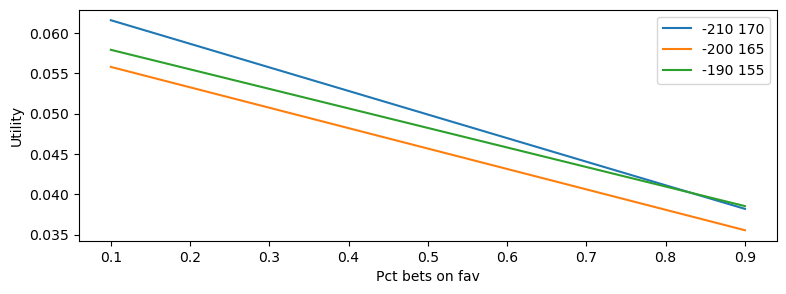

In [9]:
import matplotlib as mpl
from matplotlib import pyplot as plt

fig,ax = plt.subplots(1,1,figsize=(9,3))

x = np.arange(.1,1,.1)
y = np.array([get_utility(*get_net(xx)) for xx in x])
y2 = np.array([get_utility(*get_net(xx,fav_line=210,dog_line=170)) for xx in x])
y3 = np.array([get_utility(*get_net(xx,fav_line=190,dog_line=155)) for xx in x])
#y4 = np.array([get_utility(*get_net(xx,fav_line=200,dog_line=135)) for xx in x])
#y4 = np.array([get_utility(*get_net(xx,fav_line=165,dog_line=200)) for xx in x])
ax.plot(x,y2,label="-210 170")
ax.plot(x,y,label="-200 165")
ax.plot(x,y3,label="-190 155")
#ax.plot(x,y4,label="-165 200")
#ax.plot(x,y4,label="-200 135")
ax.set_ylabel("Utility")
ax.set_xlabel("Pct bets on fav")
ax.legend()
#ax.set_aspect("equal")

In [134]:
100/.36,100/.4,100/.5

(277.77777777777777, 250.0, 200.0)

In [457]:
p = np.arange(.5,1,.05)
print("probs")
print(p)
o = p/(1-p)
print("odds")
print(o)
print("lines")
print(100*o)

probs
[0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95]
odds
[ 1.          1.22222222  1.5         1.85714286  2.33333333  3.
  4.          5.66666667  9.         19.        ]
lines
[ 100.          122.22222222  150.          185.71428571  233.33333333
  300.          400.          566.66666667  900.         1900.        ]


### Break-even point for the bettor

What should the probability of what you're betting on be in order
to make that bet profitable in the long run?  One way to attack
this question is to find the point at which the expected utility is
0.  Let $b$ be the amount of money you're betting, which is also the amount
you stand to lose.  Let $w$ be the amount you stand to win if if you win.
And let $p$ be the probability of winning the bet.  That's what we
want to solve for.

Then the breakeven probability is the probability for which the expected utility is 0. 
So it's where the following relationship holds.

$$
\begin{array}{lcl}
0 &=& pw - (1-p)b\\
pw &=& (1-p)b\\
pw &=& b - pb\\
pw+pb &=& b\\
p(w+b) &=& b\\
p &=& \frac{b}{b+w}
\end{array}
$$

If $p$ is the actual probability of winning, and you bet $\$b$ over and over for
a chance to win $\$w$, then at the end of a long sequence of bets, you could expect to break even.
If you believe the probability is actually $q$ and $q >p$, then you stand to make money.
If we leave $w$ and $b$ constant and substitute $q$ for $p$, the expected utility
is positive.

As an example, let's say the money line on the dog is 167.  Then the odds on the dog are

In [498]:
100/167

0.5988023952095808

With an underdog moneyline of 167.
you bet $\$100$ to win $\$167$, so the break-even probability is

In [499]:
100/(100+167)

0.37453183520599254

That's about 3 in 8. If you believe the dog has a better chance to win than 3 in 8, this
is a bet you stand to make money on.

For example, if the true probability is actually .5, then the expected utility of that bet is

$$
.5 * 167 - .5 *100 = 33.5
$$

Not too surprisingly, the breakeven probability 
is also the probability we associated with odds of 100/167 according to the formula
for converting odds to probabilities:

In [501]:
o=100/167
o/(1+o)

0.37453183520599254

Proof of the general case: the definition of odds is 

$$
o = p/(1-p)
$$ 

And when you solve that equation for $p$ you get

$$
p = o/(o+1) =\frac{b/w}{b/w + 1} = b/(b+w)
$$

So the break-even probability is nothing more than the probability corresponding to the odds 
implied by the moneyline.

Putting this in the form of a rule to live by, you stand to win money on a bet
if you believe the probability of winning is greater than the probability implied by odds the oddsmaker is
offering.  And when is that?  Well, since the oddsmaker's job is to inflate the probability
in order to pay the rent, it's when the oddsmakers have made a mistake about what the actual
probability is.  And when is that?

Well, not very often. Because the guys in Vegas are pretty smart.  But a scenario that has often
seduced bettors is the belief that they have information the oddsmakers don't
(for example, information that the favorite has been hiding an injury to a star player).
This is often illusory because part of being smart in oddsmaking is making sure you
the most uptodate information.

##  Even odds and the PIP

What should the odds makers do when the true probability of a proposition is .5?  Well the PIP says
that if the true probability of Team A winning is .5, you inflate the probability to say .524 (making
Team A a favorite) and offer a line of -110, since:

In [503]:
100/(.477/.524)

109.85324947589099

But then exactly the same reasoning applies to Team B, so you end up with a betting line with
two negative numbers (that is, both teams are being treated as a slight favorite).  This kind
of betting line does happen, and when it happens, it means the oddsmakers truly believe the game
is even.  In  terms of how good the oddsmakers believe the teams are, it probably means they
think the visitor is slightly better than the home team, since the home team advantage
is statistically a real thing in many sports.
